Shape of the dataset: (48842, 16)

First few rows of the dataset:
   Unnamed: 0  age         workclass  fnlwgt  education  education-num  \
0           0   39         State-gov   77516  Bachelors             13   
1           1   50  Self-emp-not-inc   83311  Bachelors             13   
2           2   38           Private  215646    HS-grad              9   
3           3   53           Private  234721       11th              7   
4           4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-wee

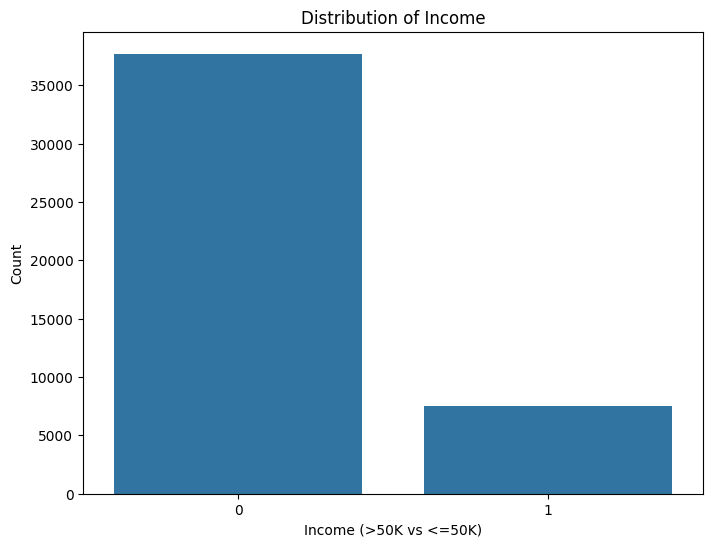

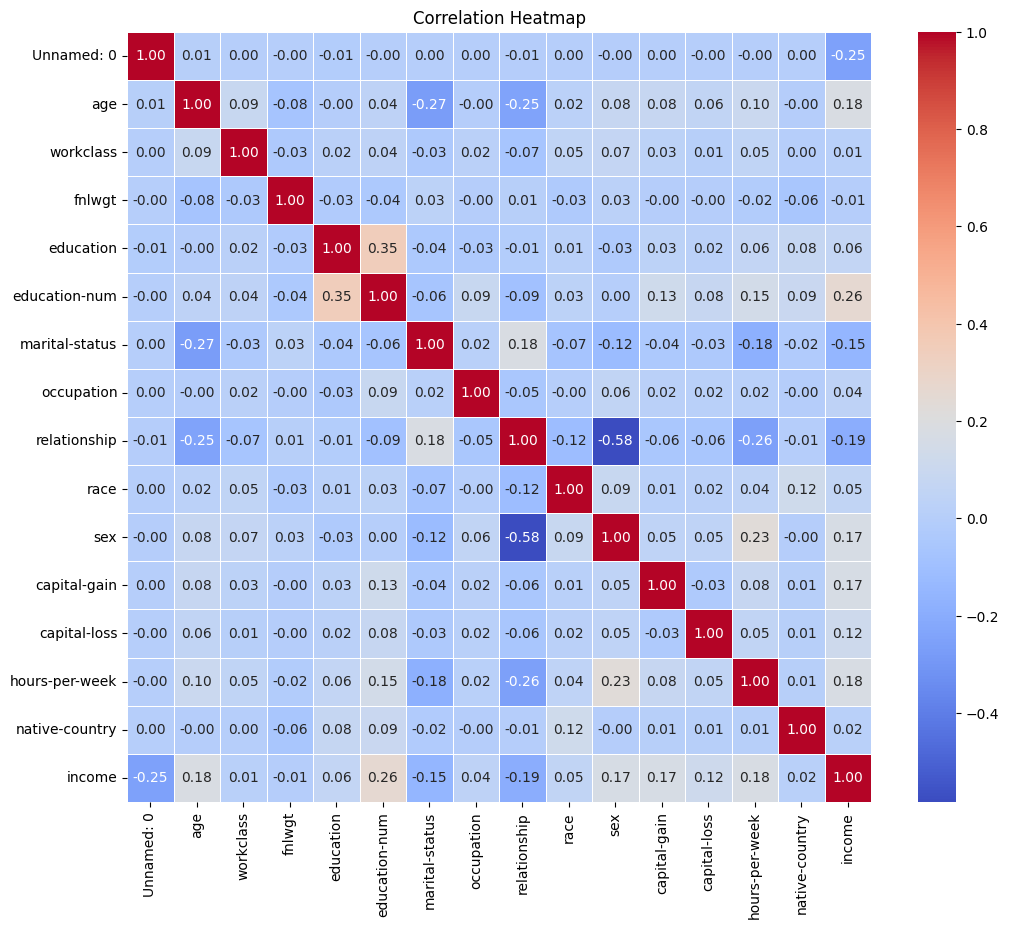

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
data_path = r"C:\Users\venka\OneDrive\Desktop\Census_Dataset.csv"
df = pd.read_csv(data_path)

# Display first shape of the dataset
print("Shape of the dataset:", df.shape)

# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(df.head())

# Display information about the dataset
print("\nDataset Information:")
print(df.info())

# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values before handling
print("\nMissing Values (before handling):")
print(df.isnull().sum())

# Handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Check for missing values after handling
print("\nMissing Values (after handling):")
print(df.isnull().sum())

# Preprocess the target variable 'income'
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split dataset into features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Handle class imbalance with oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train models
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate models
print("\nAccuracy Scores:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

# Visualizations (commented out as requested)
# Distribution of Income
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=df)
plt.title('Distribution of Income')
plt.xlabel('Income (>50K vs <=50K)')
plt.ylabel('Count')
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()